In [32]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
btcDF = pd.read_csv('BTC_USD_2020-05-18_2021-05-17-CoinDesk.csv')
emtDF = pd.read_csv('TweetsElonMusk.csv')

In [3]:
print(emtDF.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [8]:
emtDates = pd.to_datetime(emtDF['date'])
print(emtDates.max())

2021-04-17 00:00:00


In [7]:
print(btcDF.columns)

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')


In [25]:
btcDates = btcDF['Date'][:-30]
print(max(pd.to_datetime(btcDates)))

2021-04-17 00:00:00


In [76]:
btcDF2 = btcDF.drop(['Currency'],axis=1)

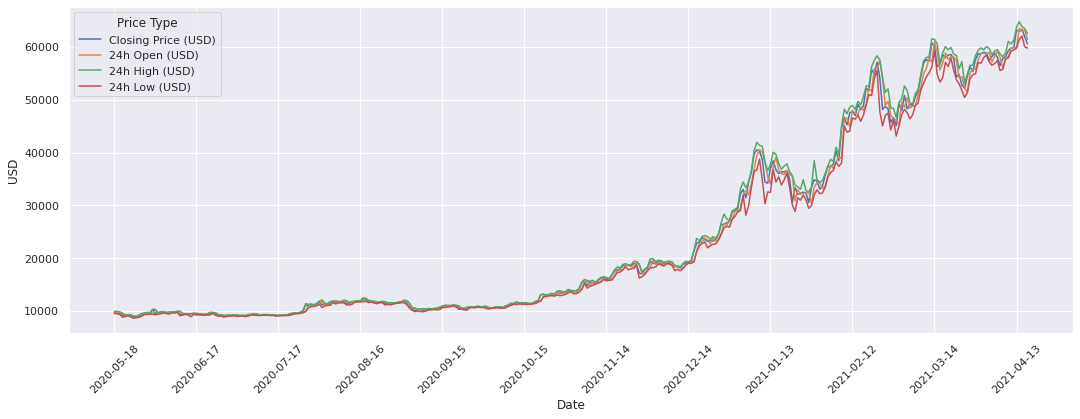

In [92]:
plt.figure(figsize = (18,6))
sb.set_theme()
btcLine = sb.lineplot(data = pd.melt(btcDF2[0:-30], 'Date', value_name = 'USD', var_name = 'Price Type'),
                      x = 'Date', 
                      y = 'USD', 
                      hue = 'Price Type')
plt.xticks(range(0,len(btcDates),30), rotation = 45);

In [95]:
btcDF2['OpenClose Difference (USD)'] = btcDF2['Closing Price (USD)'] - btcDF2['24h Open (USD)']

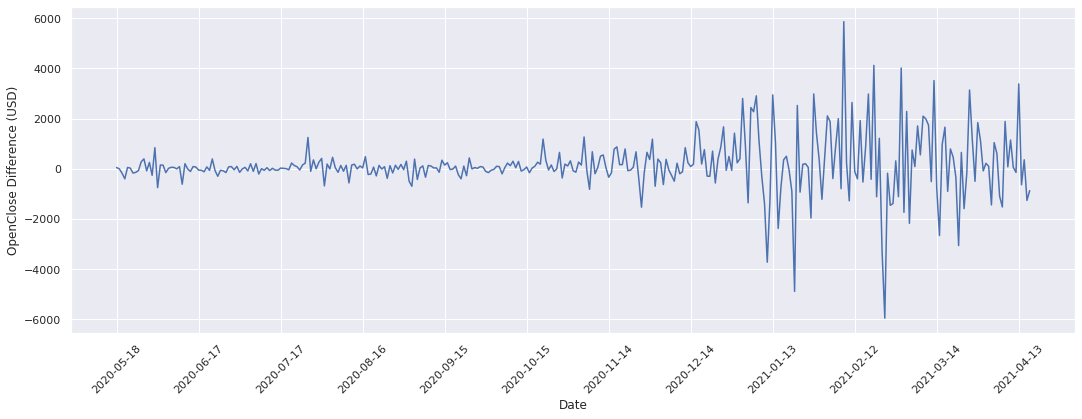

In [101]:
plt.figure(figsize = (18,6))
sb.lineplot(data = btcDF2[:-30], x = 'Date', y = 'OpenClose Difference (USD)')
plt.xticks(range(0,len(btcDates),30), rotation = 45);

How do we find tweets about bitcoin?

In [102]:
emtDF['tweet'].head()

0    @vincent13031925 For now. Costs are decreasing...
1                             Love this beautiful shot
2    @agnostoxxx @CathieDWood @ARKInvest Trust the ...
3                   The art In Cyberpunk is incredible
4                                      @itsALLrisky 🤣🤣
Name: tweet, dtype: object

In [114]:
photos = [photo for photo in emtDF['photos'] if photo != '[]']

In [116]:
len(photos)

726

Great, can I process these photos, looking for bitcoin?